In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[0])

NUM_DIGITS = 10
trainLabels = to_categorical(train_labels, NUM_DIGITS)
testLabels = to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(units=200, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=200, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
tbCallback = TensorBoard(log_dir="./logs/demo70", histogram_freq=0,
                         write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[tbCallback])

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   

In [3]:
predictedLabels = model.predict_classes(testImages)
predictedLabels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [5]:
predicted = model.predict(testImages)
predicted[:10]

array([[0.0000000e+00, 0.0000000e+00, 8.0246904e-38, 1.3663959e-36,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 3.8952327e-36],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.1622030e-32, 1.0000000e+00, 4.5064030e-18, 1.1369947e-28,
        1.3064747e-18, 3.3716439e-23, 6.4620931e-19, 1.4502204e-15,
        9.3018392e-17, 1.0334033e-27],
       [1.0000000e+00, 2.4627263e-28, 1.9338869e-20, 2.7167115e-26,
        1.2688818e-23, 1.3141427e-25, 1.0839678e-21, 2.4803564e-21,
        4.5039979e-25, 1.2355966e-18],
       [1.2181354e-33, 2.1211270e-26, 1.0375147e-28, 0.0000000e+00,
        1.0000000e+00, 5.0125518e-32, 6.6902196e-29, 1.2546016e-15,
        1.7625789e-34, 6.6270394e-13],
       [8.7944047e-27, 1.0000000e+00, 4.2064307e-16, 3.7422447e-25,
        2.9498342e-15, 3.3277138e-23, 6.1158798e-18, 8.68

In [6]:
import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("test image marked as %d, predict as %d"%(test_labels[index], predictedLabels[index]))
    plt.imshow(test_images[index],cmap='binary')
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

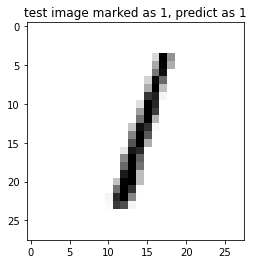

In [7]:
plotTestImage(2)

In [8]:
import pandas as pd
pd.crosstab(test_labels, predictedLabels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,0,0,0,2,1,4,0
1,0,1121,2,0,0,1,2,2,7,0
2,2,2,996,2,4,0,3,5,18,0
3,2,0,4,980,0,5,0,6,8,5
4,2,0,1,0,966,0,6,1,2,4
5,4,0,0,11,1,858,12,0,5,1
6,4,2,1,1,1,1,947,0,1,0
7,2,1,4,0,1,0,0,1010,6,4
8,5,0,1,0,3,3,1,3,954,4


In [9]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictedLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [22]:
measure1[(measure1.label==3)&(measure1.predict==5)]

,label,predict
449,3,5
2953,3,5
3943,3,5
4808,3,5
6045,3,5


<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

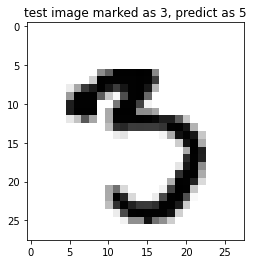

In [23]:
plotTestImage(4808)

449


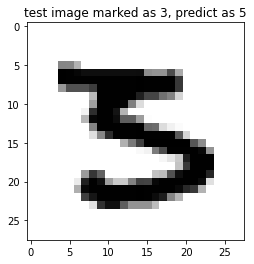

2953


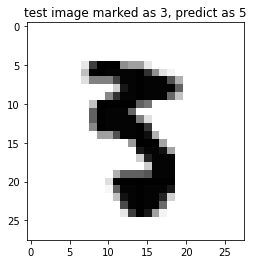

3943


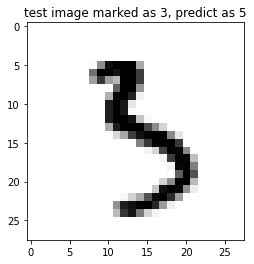

4808


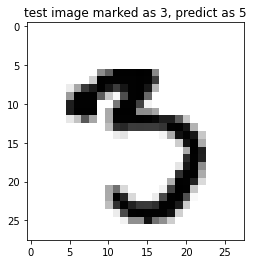

6045


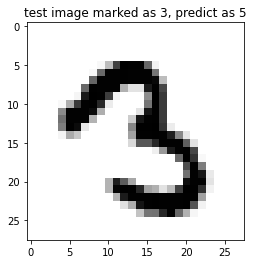

In [21]:
errors = measure1[(measure1.label==3)&(measure1.predict==5)]
for errId in errors.index:
    print(errId)
    plotTestImage(errId)
    plt.show()

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

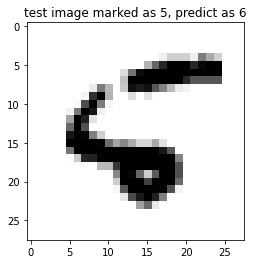

In [13]:
plotTestImage(8)

In [14]:
measure1[(measure1.label==7)&(measure1.predict==1)]

,label,predict
1260,7,1


<module 'matplotlib.pyplot' from 'c:\\users\\admin\\envs\\tf_ml_ds_37\\lib\\site-packages\\matplotlib\\pyplot.py'>

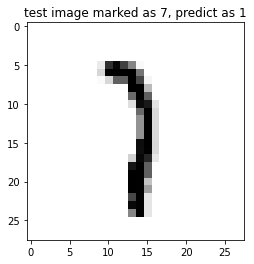

In [15]:
plotTestImage(1260)